In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
import pandas as pd

In [2]:
genre_names = ['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Horror', 'Mystery', 'Romance', 'Science Fiction', 'Thriller']

In [10]:
# i had everything already, but all you need to start is the predictions and the labels

cnn_confusion = np.load("cnn_confusion.npy")
cnn_predictions = np.load("cnn_predictions.npy")
cnn_test_labels = np.load("cnn_test_labels_shaped.npy")

In [5]:
cnn_confusion

array([[[    0, 26420],
        [    0,  6246]],

       [[    0, 29436],
        [    0,  3230]],

       [[   19, 22427],
        [   59, 10161]],

       [[    0, 27562],
        [    0,  5104]],

       [[    0, 17064],
        [    0, 15602]],

       [[    0, 26750],
        [    0,  5916]],

       [[    0, 29418],
        [    0,  3248]],

       [[    0, 27330],
        [    0,  5336]],

       [[    0, 28566],
        [    0,  4100]],

       [[    0, 21994],
        [    0, 10672]]])

In [7]:
cnn_predictions[:10]

array([[0.38326207, 0.26441905, 0.1803122 , 0.1553944 , 0.33257246,
        0.21683125, 0.09928358, 0.06969807, 0.19794996, 0.3550384 ],
       [0.32696122, 0.26300657, 0.30826807, 0.13326345, 0.3143887 ,
        0.14915903, 0.08117546, 0.08255508, 0.1620636 , 0.27119997],
       [0.275502  , 0.24363425, 0.3897944 , 0.12572025, 0.32886305,
        0.1304249 , 0.07746516, 0.1013549 , 0.1332259 , 0.22845127],
       [0.3155576 , 0.24493372, 0.21835862, 0.14461555, 0.375544  ,
        0.19081971, 0.09827618, 0.09284144, 0.16470064, 0.32224897],
       [0.3347815 , 0.2611071 , 0.21544845, 0.15203394, 0.3694833 ,
        0.19797964, 0.10375569, 0.09056116, 0.1795255 , 0.32812107],
       [0.30899408, 0.24897769, 0.2265082 , 0.14097932, 0.37968752,
        0.18538448, 0.09677721, 0.09556156, 0.16036874, 0.3085975 ],
       [0.3490317 , 0.26163936, 0.1892405 , 0.15161765, 0.36526647,
        0.20522472, 0.10260159, 0.08166736, 0.18612286, 0.34499073],
       [0.30628735, 0.24994244, 0.2378138

In [99]:
# pick a decision boundary.  i used 30% bc prediction values are so low, but start with 50% and see how results look
cnn_y_pred_30 = (cnn_predictions > .5)

In [100]:
# make confusion matrix
cnn_confusion_30 = multilabel_confusion_matrix(y_true = cnn_test_labels, y_pred = cnn_y_pred_30 )

In [101]:
cnn_confusion_30

array([[[26420,     0],
        [ 6246,     0]],

       [[29436,     0],
        [ 3230,     0]],

       [[22427,    19],
        [10161,    59]],

       [[27562,     0],
        [ 5104,     0]],

       [[17064,     0],
        [15602,     0]],

       [[26750,     0],
        [ 5916,     0]],

       [[29418,     0],
        [ 3248,     0]],

       [[27330,     0],
        [ 5336,     0]],

       [[28566,     0],
        [ 4100,     0]],

       [[21994,     0],
        [10672,     0]]])

KeyboardInterrupt: ignored

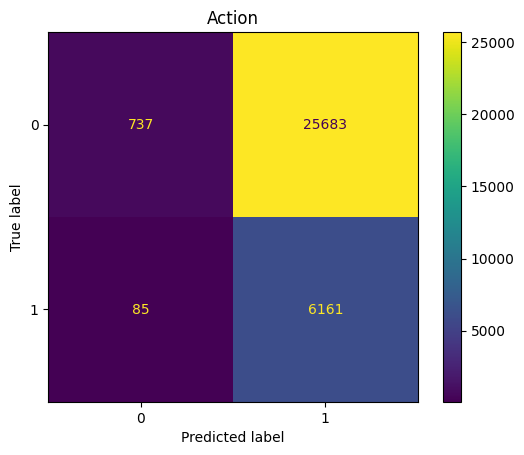

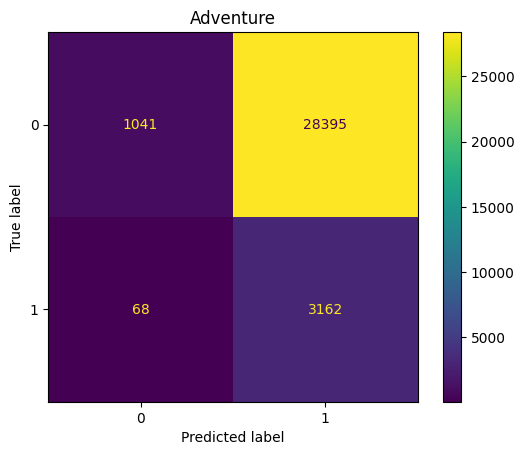

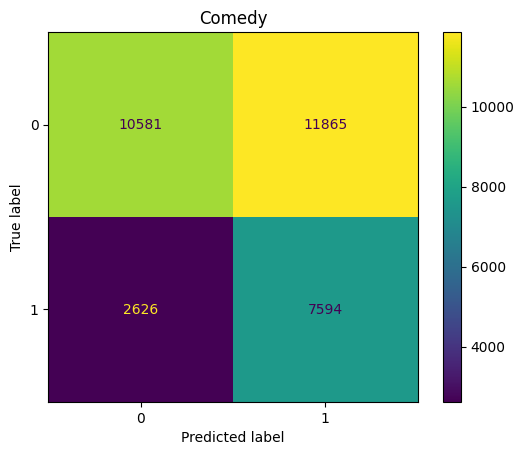

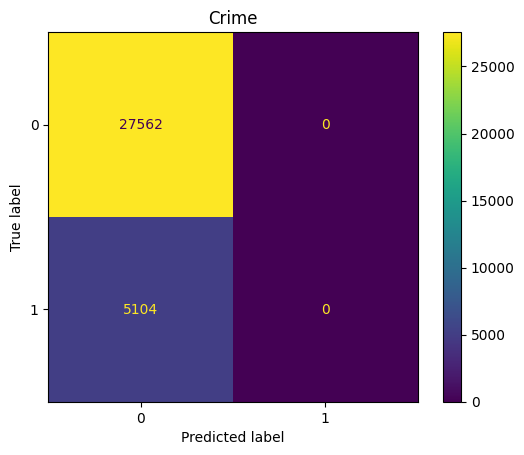

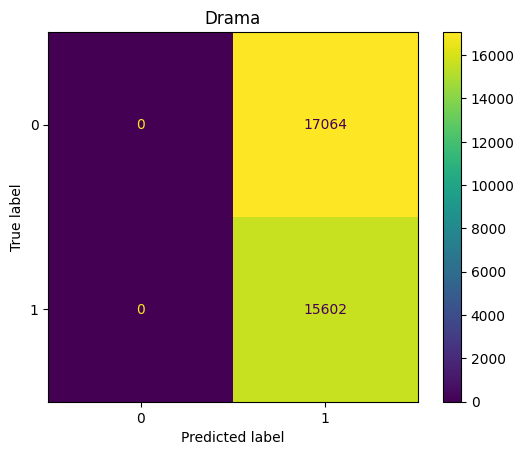

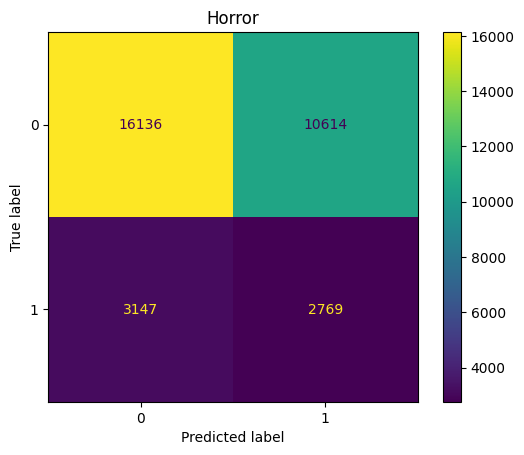

In [91]:
# plot and save confusion matrix for each genre
for conf, genre in zip(cnn_confusion_30, genre_names):
  disp = ConfusionMatrixDisplay(conf)
  disp.plot()
  plt.title(genre)
  plt.savefig(str(genre)+"_cnn_conf.png")

In [102]:
# make classification report
cnn_30_class = classification_report(y_true = cnn_test_labels, y_pred = cnn_y_pred_30, target_names= genre_names, output_dict = True)
cnn_30_class

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Action': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6246},
 'Adventure': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 3230},
 'Comedy': {'precision': 0.7564102564102564,
  'recall': 0.005772994129158513,
  'f1-score': 0.011458535637987958,
  'support': 10220},
 'Crime': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5104},
 'Drama': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 15602},
 'Horror': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5916},
 'Mystery': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 3248},
 'Romance': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 5336},
 'Science Fiction': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 4100},
 'Thriller': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 10672},
 'micro avg': {'precision': 0.7564102564102564,
  'recall': 0.0008468008152251916,
  'f1-score': 0

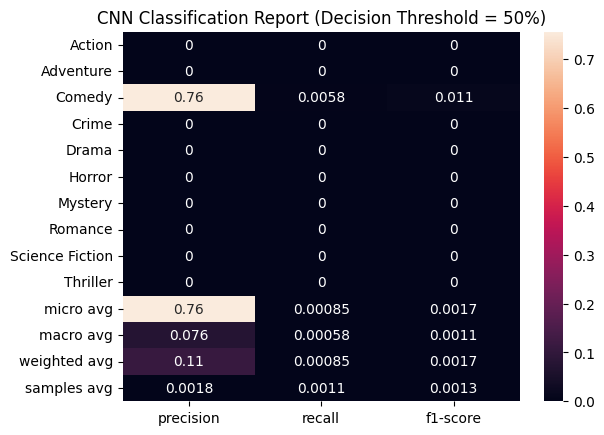

In [103]:
# plot classification report
cnn_heatmap = sns.heatmap(pd.DataFrame(cnn_30_class).iloc[:-1, :].T, annot=True)
cnn_heatmap.set_title("CNN Classification Report (Decision Threshold = 50%)")
fig = cnn_heatmap.get_figure()
fig.savefig("cnn_class_heatmap.png")


In [43]:
confusion_yamnet = np.load("confusion_yamnet.npy")
with open("yamnet_class_report", "rb") as f:
  classification_yamnet = pkl.load(f)

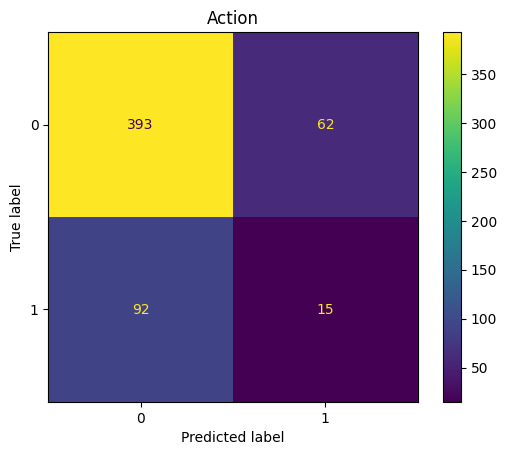

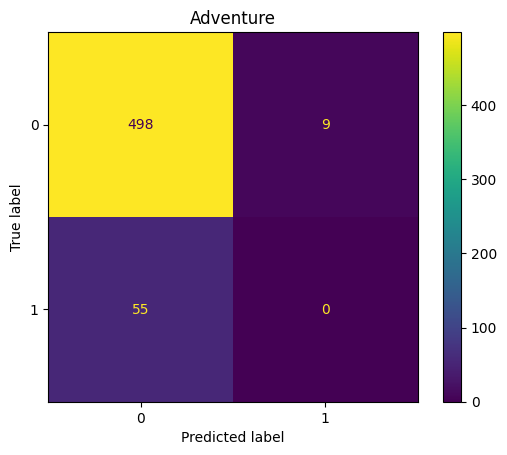

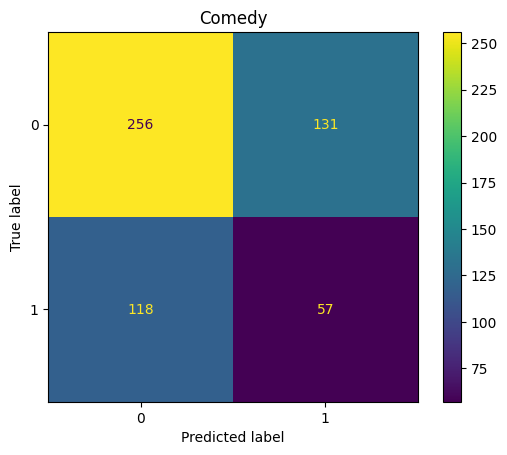

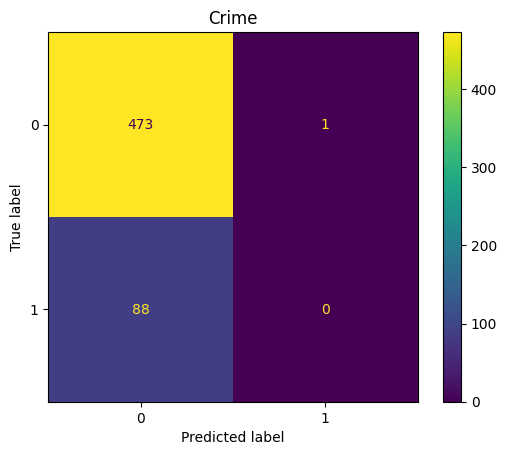

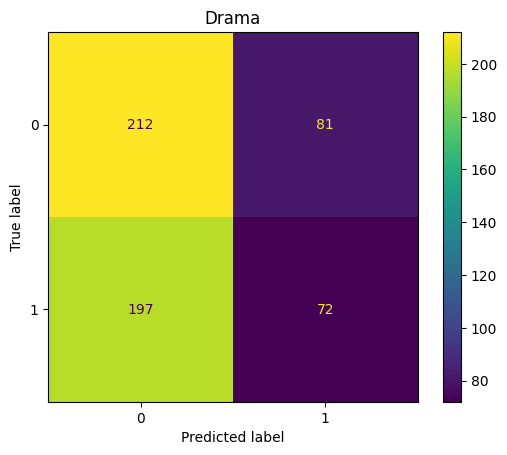

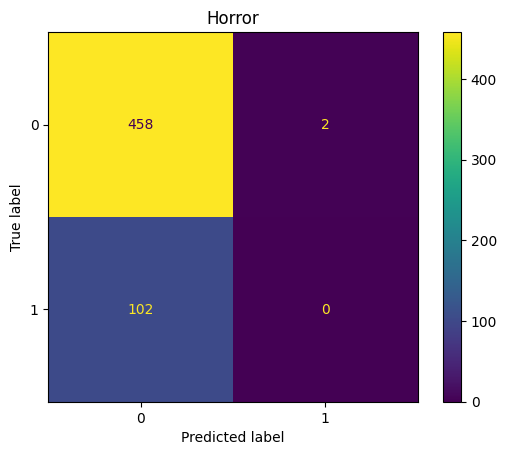

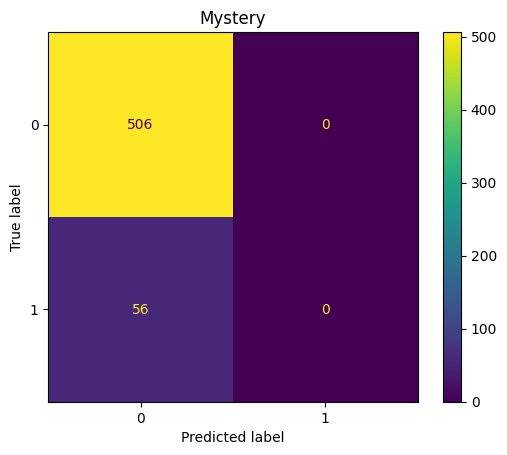

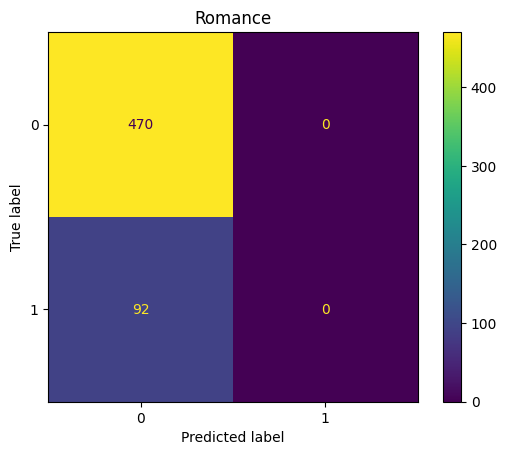

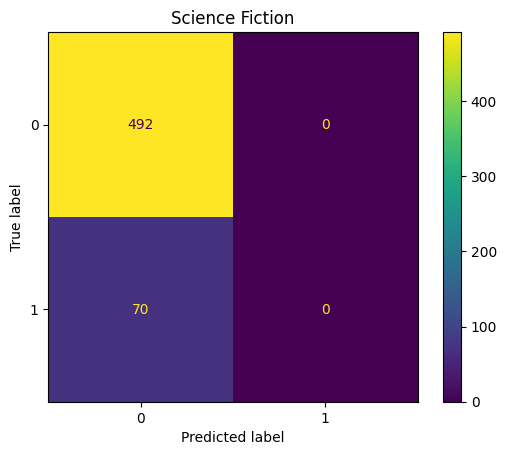

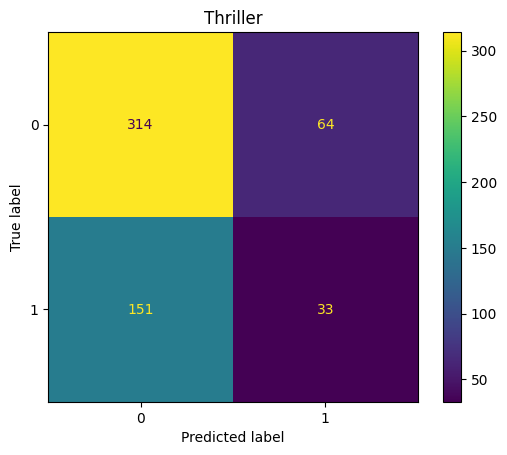

In [44]:
# plot and save confusion matrix for each genre
for conf, genre in zip(confusion_yamnet, genre_names):
  disp = ConfusionMatrixDisplay(conf)
  disp.plot()
  plt.title(genre)
  plt.savefig(str(genre)+"_yamnet_conf.png")

In [77]:
yamnet_predictions = np.load("yamnet_predictions.npy")
yamnet_test_labels = np.load("yamnet_test_labels_shaped.npy")

In [104]:
y_pred_binary = (yamnet_predictions > .5)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


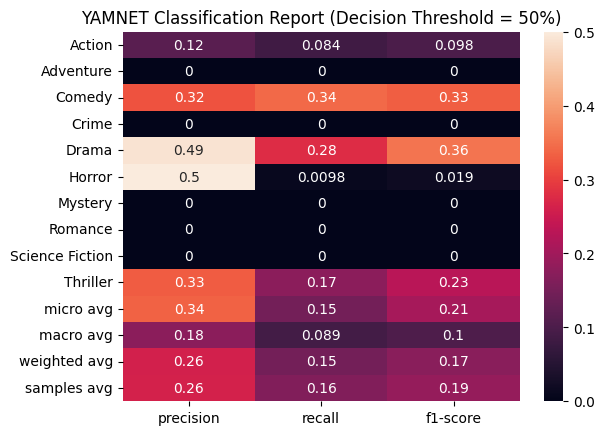

In [106]:
# plot classification report
classification_yamnet = classification_report(y_true = yamnet_test_labels , y_pred = y_pred_binary, target_names= genre_names, output_dict = True)
cnn_heatmap = sns.heatmap(pd.DataFrame(classification_yamnet).iloc[:-1, :].T, annot=True)
cnn_heatmap.set_title("YAMNET Classification Report (Decision Threshold = 50%)")
fig = cnn_heatmap.get_figure()
fig.savefig("yamnet_class_heatmap.png")

In [47]:
confusion_vggish = np.load("confusion_vggish.npy")
with open("vggish_class_report", "rb") as f:
  classification_vggish = pkl.load(f)

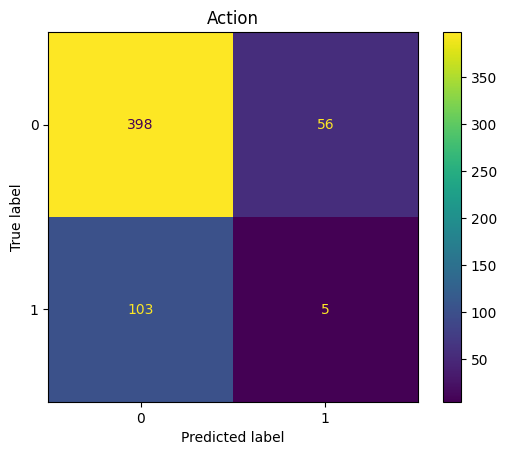

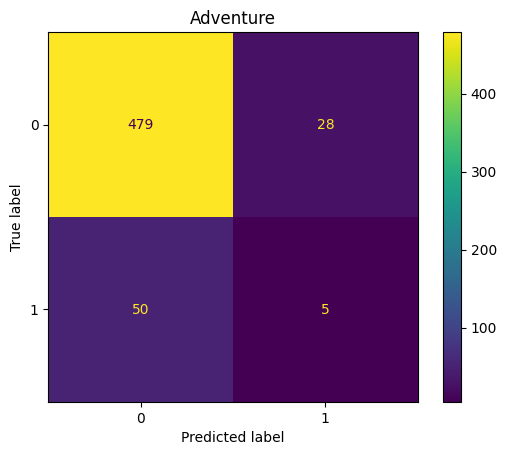

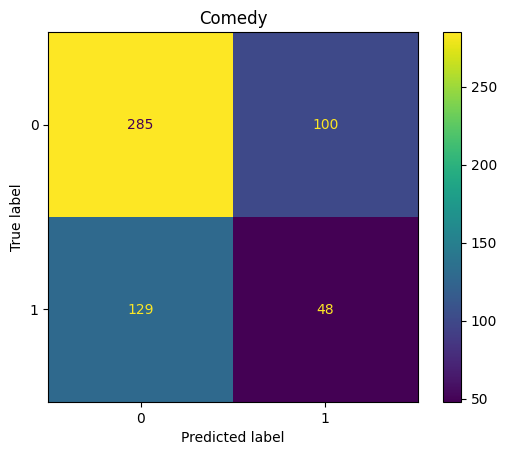

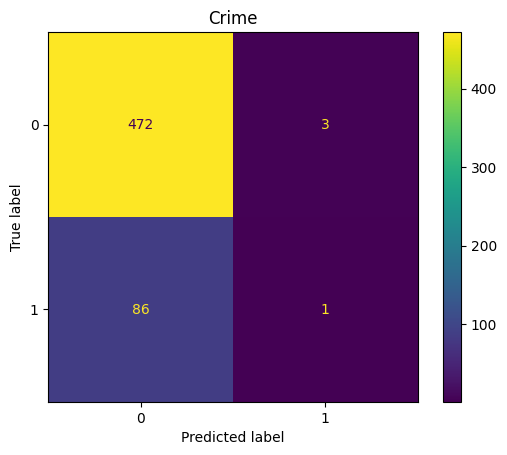

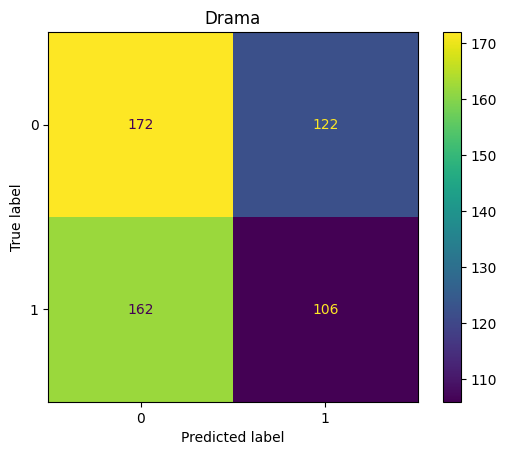

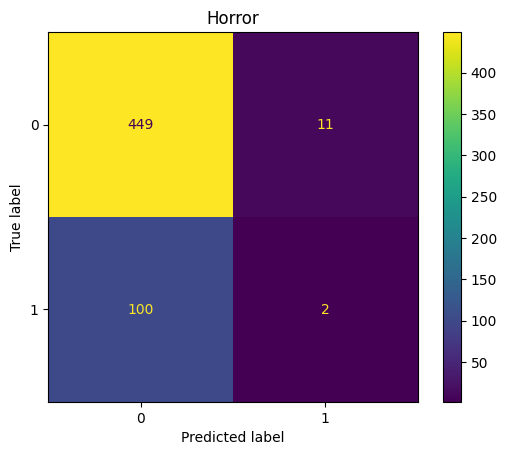

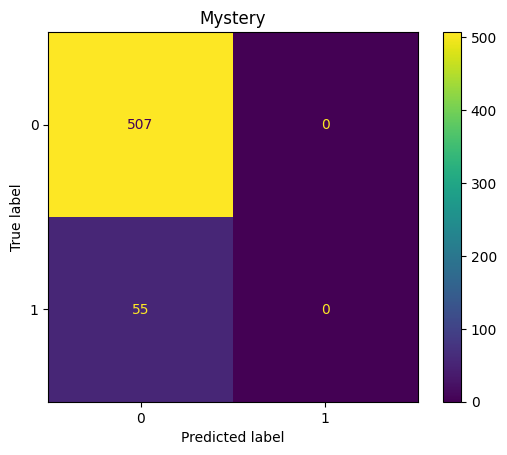

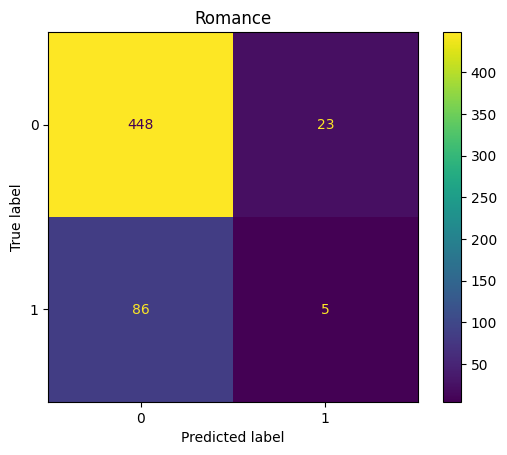

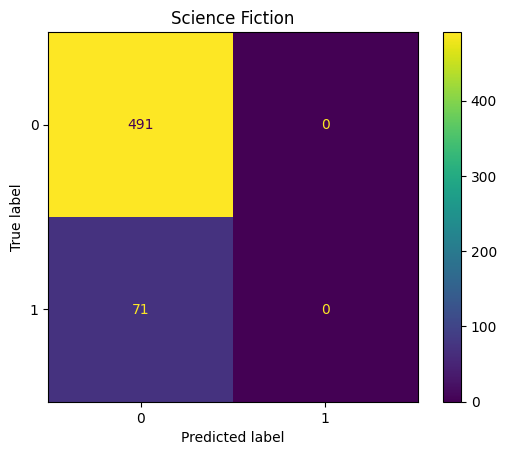

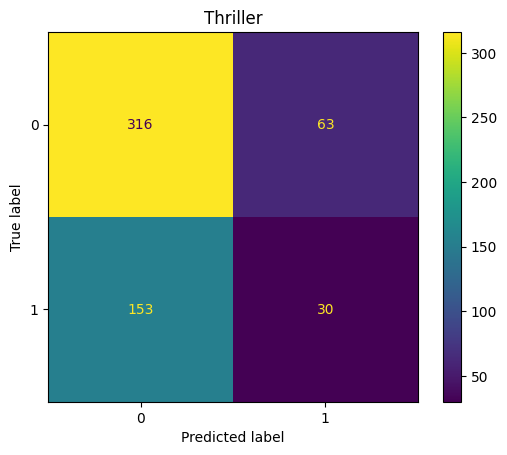

In [48]:
# plot and save confusion matrix for each genre
for conf, genre in zip(confusion_vggish, genre_names):
  disp = ConfusionMatrixDisplay(conf)
  disp.plot()
  plt.title(genre)
  plt.savefig(str(genre)+"_vggish_conf.png")

In [59]:
vggish_predictions = np.load("predictions_vggish.npy")
vggish_test_labels = np.load("vggish_test_labels_shaped.npy")

In [107]:
y_pred_binary = (vggish_predictions > .5)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


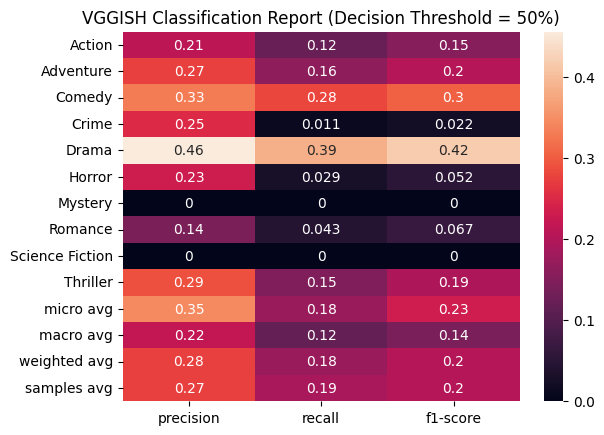

In [109]:
# plot classification report
classification_vggish = classification_report(y_true = vggish_test_labels , y_pred = y_pred_binary, target_names= genre_names, output_dict = True)
cnn_heatmap = sns.heatmap(pd.DataFrame(classification_vggish).iloc[:-1, :].T, annot=True)
cnn_heatmap.set_title("VGGISH Classification Report (Decision Threshold = 50%)")
fig = cnn_heatmap.get_figure()
fig.savefig("vggish_class_heatmap.png")